# Housing Prices - Kaggle Competition

## Importing the Core Libraries

In [230]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import ydf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy

## Importing the CSV File
This ensures that we have imported the CSV files to train and test our algorithm on.

In [207]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### Learn the Train and Test Set Shape

In [208]:
print(f"The shape of the training set is: {train_data.shape}")
print(f"The shape of the test set is: {test_data.shape}")

The shape of the training set is: (1460, 81)
The shape of the test set is: (1459, 80)


That being we learn that the size of the shape of the training set is 1460 rows by 81 columns, and the test set is 1459 rows by 80 columns.

### Data Sample

In [209]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This provides us with the first 5 items in the training data set, including the output value y.

In [210]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Understanding the Data

### Data Types

We want to understand which data types each feature are so we can grasp what we are working with in this data set. This generally applies also to the test data as it has the same features.

In [211]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We also want to remove the ID column as it doesn't serve much usage to the algorithm when calculating.

In [212]:
train_data.drop("Id", axis=1, inplace=True)
test_data.drop("Id", axis=1, inplace=True)

train_data.head(5)
test_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Understanding the Data 

This section allows us to explore all the data that is present within this data set to get us to grasp what data is present and allow us to understand the overall trend within the datasets, the average sale values, and much more so that when it comes to understanding the predicted values outputted by our machine learning algorithm, we can further understand where the values are going wrong.

We also want to understand factors such as, if there are correlations present between the different features and the sales price, the outliers present within the data, and data which is missing which can help us remove features that are negatively impacting our data set.

I also want to thank Pedro Marcelino for providing some inspiration on data exploration allowing me to provide some insights into what different data is present and the deeper relations within it, and furthermore, the discovery of columns which are not useful in the data set and will hinder our training.

#### Understanding Sale Price

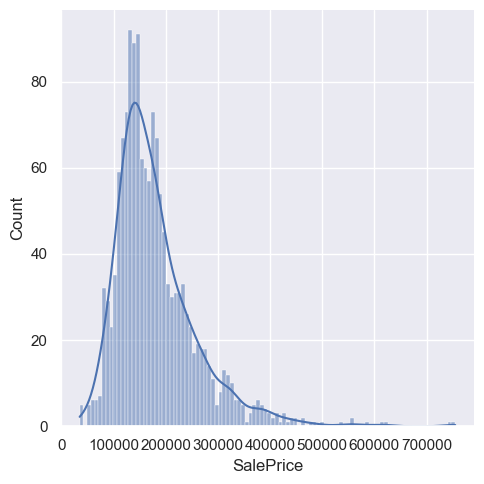

In [213]:
sns.displot(train_data['SalePrice'], bins=100, kde=True);

The distribution displayed above gives us an understanding of the different sales prices and how many houses on this data set are within each pricing ranges. This distribution utilizes 100 bins, which means it broke the data into 100 equally sized parts to distribute the data upon.

In [214]:
print(train_data["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


We now further understand that the mean pricing of the houses are 180,921 and that there's a standard deviation of 79,442. The other data displaying the data distribution of the housing sale pricing can be seen to effect here.

We further want to understand the relationship that is ever present with sale price and other numerical values which are present.

##### EXAMPLE: Number of Bedrooms vs Sale Prices

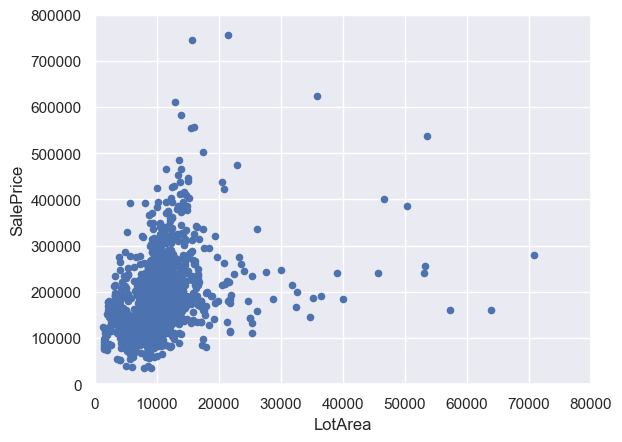

In [215]:
data = pd.concat([train_data["SalePrice"], train_data["LotArea"]], axis=1)
data.plot.scatter(x="LotArea", y="SalePrice", ylim=(0,800000), xlim=(0,80000));

It can be seen that this is a linear relationship is present between the lot area and price, which means that there is clearly a good relationship between the two that is present.

##### EXAMPLE: Year Built vs Sale Prices

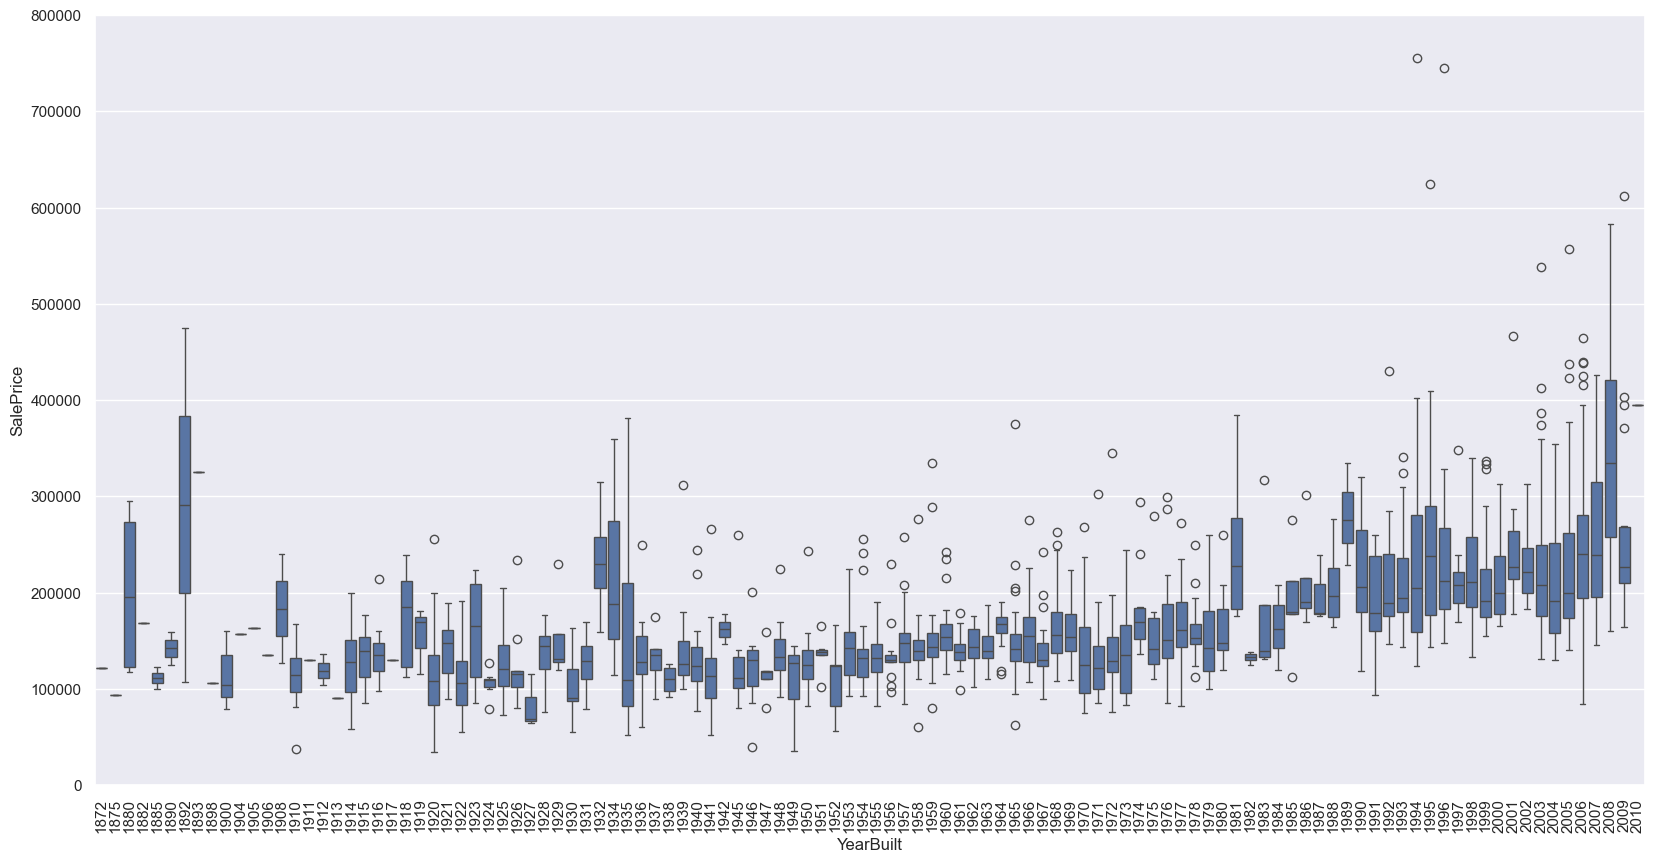

In [216]:
data = pd.concat([train_data["SalePrice"], train_data["YearBuilt"]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

There is a relationship that also appears to be present within the year built and the sale price, that being that with the more recently the building was constructed the higher the price will be. Furthermore, the relationship seems to be an exponential relationship as it can be seen that there is a curve present within the data.

#### Generating a Comparisson Between Every Numerical Value and Sale Price

The code below allows us to grab the numerical values from the training data set which allows us to plot the sale price against the other features that are present within this training set.

In [217]:
train_numerical_data = train_data.select_dtypes("int64", "float64")

Now that we have obtained that we can now plot sale price vs. every other numerical feature that is present:

In [218]:
features_to_plot = [col for col in train_numerical_data if col != 'SalePrice']

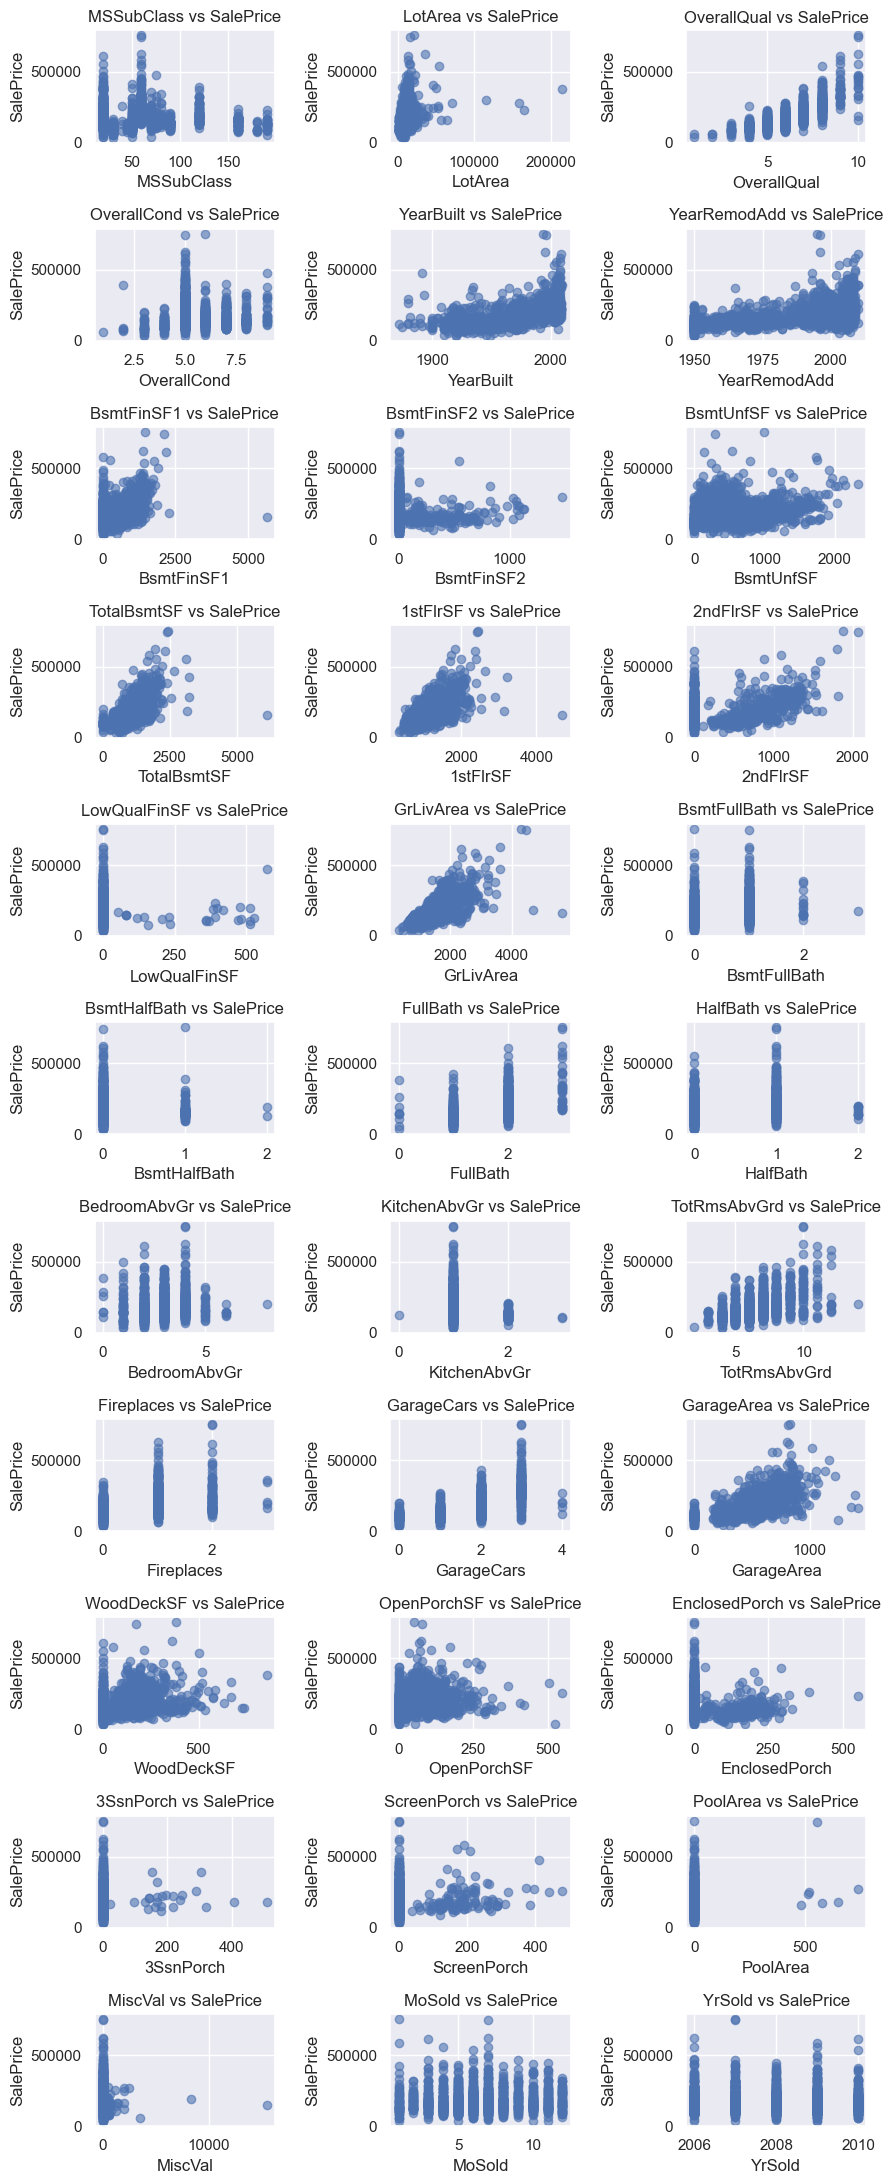

In [219]:
n_cols = 3
n_rows = -(-len(features_to_plot) // n_cols) 

# Create subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(9, 2 * n_rows))
ax = ax.flatten()  

# Plot each feature
for i, feature in enumerate(features_to_plot):
    ax[i].scatter(train_numerical_data[feature], train_data['SalePrice'], alpha=0.6)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('SalePrice')
    ax[i].set_title(f'{feature} vs SalePrice')

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


These collection of graphs gives us a large range of different graphs and features to understand the relatiobship between numerical features and sale price, however, a lot of these graphs present do not have a large correlation that is present meaning that it is harder for the machine learning algorithm to determine the a predicted y that minimizes the cost function.  

However, there is a solution to this problem to help us further select features which will be more impactful to our data set and speed up the processing times of our algorithm alongside improving the accuracy of our algorithm. The code below from seaborn helps with the creation of a correlation matrix and heatmap which helps us understand which features are useful and which ones are unnecessary features.

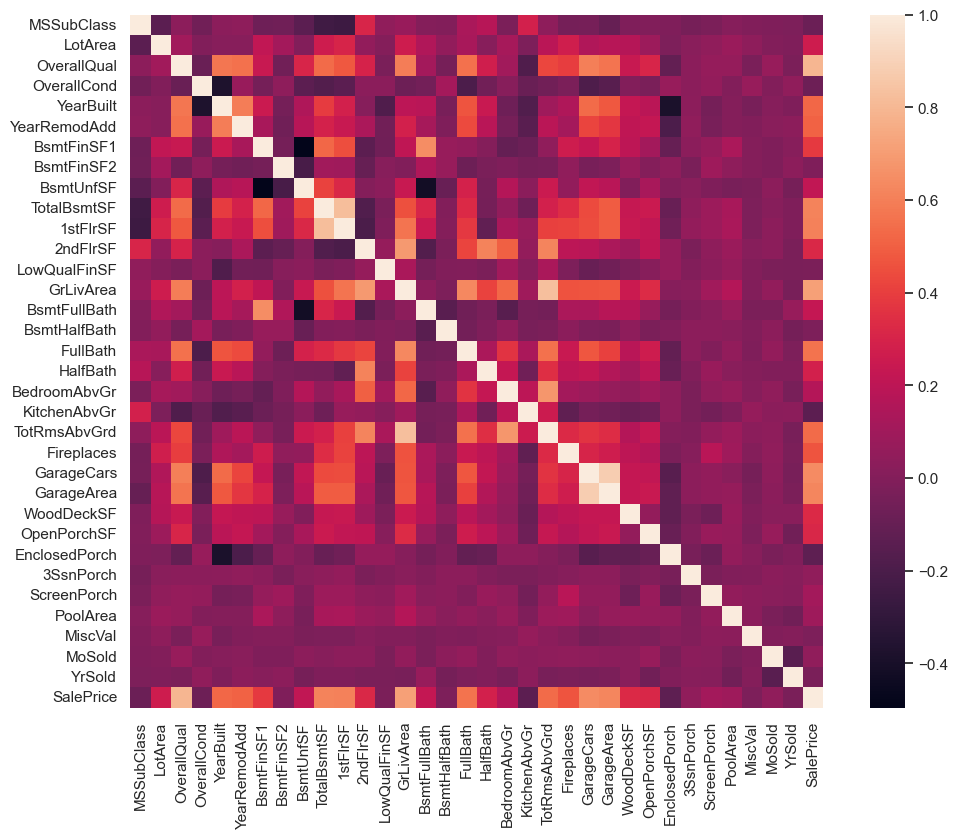

In [220]:
correlation_matrix = train_numerical_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=1, square=True);

We want to further understand which of these features are useful in the calculation of sale price, and this can be done by the following block of code (inspired by Pedro Marcelino's notebook):

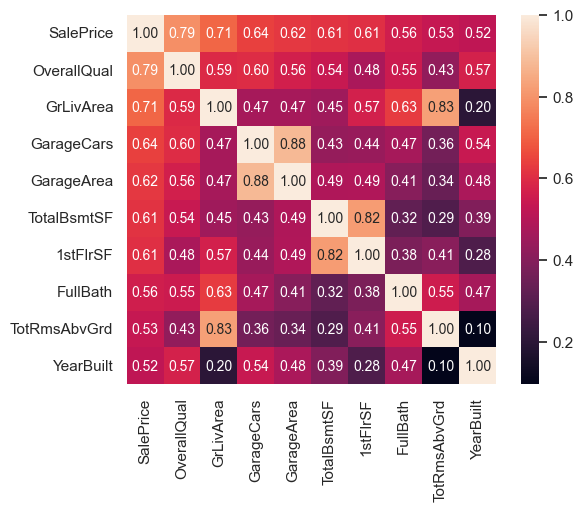

In [221]:
k = 10 # num of variables for shrunk correlation matrix
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Now we have a clear view as to which numerical features have the highest correlation with the Sales Price, which later on can help us choose which numerical features that we want to drop off the training set in order to make the algortihm as efficient as possible, in addition to ensuring that we minimize the loss function (cost function), meaning that our predicted values will end up being more accurate making our program more reliable.

We can now also explore the type of functional relationship that is present between these numerical features and the outputted values that are present through plotting with the usage of the seaborn plots.

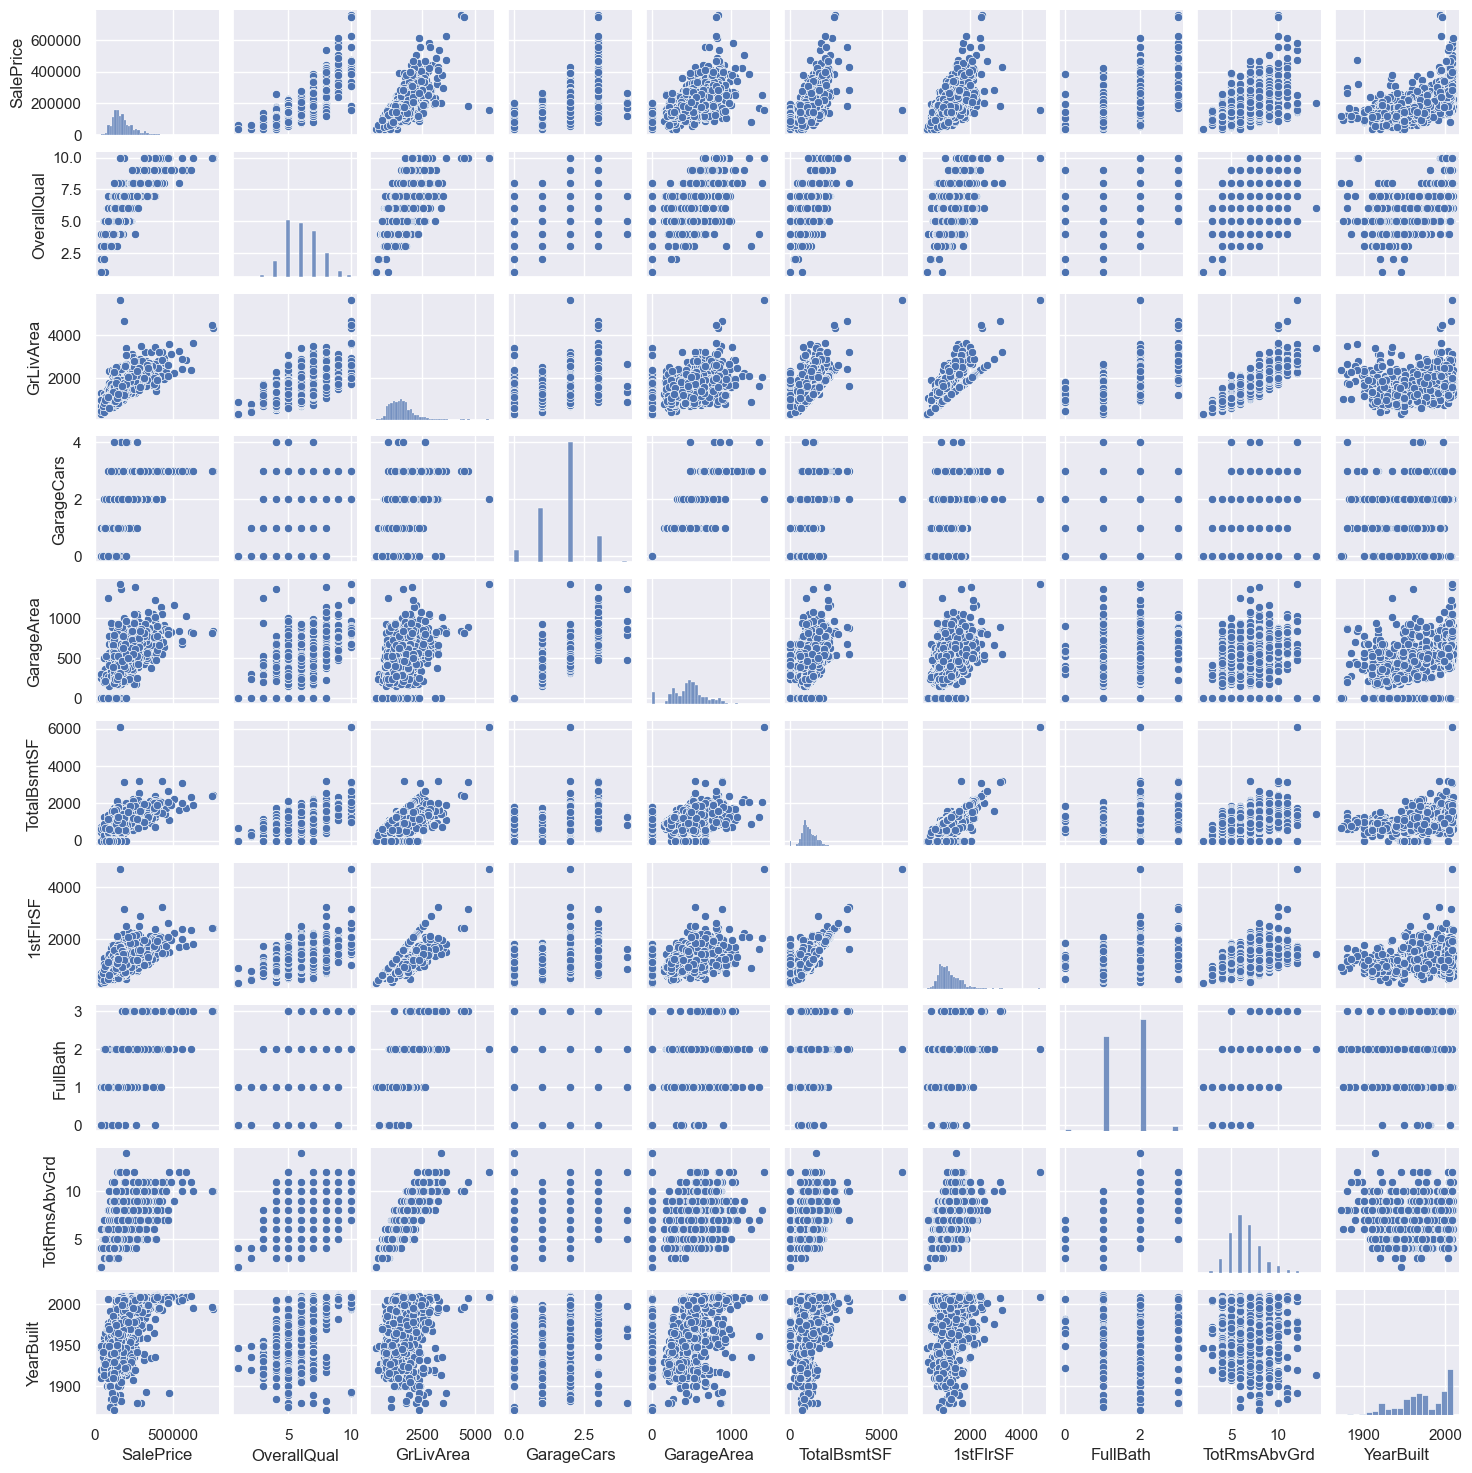

In [222]:
sns.set()
columns=["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]
sns.pairplot(train_numerical_data[columns], height=1.5)
plt.show();

We can now see the functional relationships that are present within the graphs for sale price are mostly exponential graphs.

## Feature Selection

We have spent the last few sections going over the various numerical features, and seeing the relationship they have with the numerical data, which further helps us see which numerical features don't have as much purpose on the surface level but might play a role subtly, and which numerical features have the strongest correlation with sale price which is our y, in this case it is the actual y. 

With that we can start stripping some of the numerical data from this data set, however, there is a bigger problem at hand than that, and it is the presence of missing data. Before we are able to determine which features we should remove from the data, we should primarily consider which features (numerical or non-numerical) has any piece of missing data and remove them as they may hinder the accuracy of our algorithm.

### Missing Data

In [223]:
total_md = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_md, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


We now can see the missing data, and the percentage of data that is missing. It wouldn't be wise to remove pieces of data which might have some usage in the training set, so an alternative is to find a threshold to determine which is best to remove data from this training set. We can see that that some features are almost 100% empty, while some are 0.5% empty, meaning that removing the lower end can cause us to miss out on valuable data for our training set as majority of our data has this present meaning that it could be valuable to calculating the sale price of a house. 

That method can cause some discrepencies in our data as it might remove some vital information, such as electrical which is quite vital as almost all of the houses nowadays have it. The reason we are removing things such as garage and basement related features, lot frontage, and the others are because they are factors which typically aren't included in a large majority of places being sold, or are either just covered by other features which exist and are redundant.

In [224]:
cols_to_drop = missing_data[missing_data['Total'] > 1].index
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

In [226]:
train_data.isnull().sum().max() 

np.int64(1)

In [227]:
test_data.isnull().sum().max()

np.int64(4)

The singular piece of missing data is within the electrical which we have decided to maintain.

Now that we have decided to remove certain items from the training set and the test set, we can move on to working on the actual algorithm to ensure start making predictions, and training the algorithm to ensure that it is running and producing that it minimizing the loss function.

## Training the Data

### What is a Decision Forest

### Converting Data Sets into TensorFlow Data Sets

In order for us to use TensorFlow decision forests we must convert it into a way for TensorFlow to understand. TensorFlow has different format of data sets compared to NumPy and Pandas, meaning that when training our model we have to conver it into a way for our computer to understand, just like the way a person who only speaks english can only interpret something that is written in english.

ydf is a library that is updated from TensorFlow decision forests and is faster processing rates and more features to our learning algorithm. 

We also need to realize that decision forests are typically used for the task of classification, which in this case we are not doing and our goal is to use regression. So we need to highlight that with `tfdf.keras.Task.REGRESSION` which will then allow us to make a decision forest using a regression task.

In [237]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="SalePrice", task = tfdf.keras.Task.REGRESSION)

### Selecting a Decision Forest Model

With decision forests there's a wide range of different models that come with it including `RandomForestModel`, `GradientBoostedTreesModel`, and more, however, we need to select a model that allows us to gain the best outcome possible from a decision forest. 

Random Forest is one of the more classical models of machine learning and can be seen as one of the reasons we are where we are now in machine learning mdoels, however, its approach to train multiple trees simultaneously instead of doing one tree, learning what's wrong and adapting it to the next tree is one of the many reasons why this approach may be seen as inefficient and inferior to Gradient Boosted Trees Model.

So for this approach we will use `GradientBoostedTreesModel` to ensure that we get the best result, and the fastest result from this.

In [246]:
model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)

Use /var/folders/bn/qrjbxr_55sl4m4_4mpwgjtf80000gp/T/tmp63zspcxu as temporary training directory


W0000 00:00:1753517134.419359 1762701 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1753517134.419415 1762701 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1753517134.419419 1762701 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


### Train the Model

Now that we have done this we can go ahead and train the model, with the established we can go ahead and fit it to the training data.

In [247]:
model.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.015412. Found 1460 examples.
Training model...


I0000 00:00:1753517251.315611 1762701 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1753517251.315634 1762701 kernel.cc:783] Collect training examples
I0000 00:00:1753517251.315639 1762701 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1753517251.315756 1762701 kernel.cc:401] Number of batches: 2
I0000 00:00:1753517251.315760 1762701 kernel.cc:402] Number of examples: 1460
I0000 00:00:1753517251.316788 1762701 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (8 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1753517251.316794 1762701 data_spec_inference.cc:354] 6 item(s) have been pr

Model trained in 0:00:01.090155
Compiling model...


I0000 00:00:1753517252.374713 2244005 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 30120
I0000 00:00:1753517252.374727 2244005 gradient_boosted_trees.cc:1669] Create final snapshot of the model at iteration 163
I0000 00:00:1753517252.377994 2244005 gradient_boosted_trees.cc:279] Truncates the model to 134 tree(s) i.e. 134  iteration(s).
I0000 00:00:1753517252.378083 2244005 gradient_boosted_trees.cc:341] Final model num-trees:134 valid-loss:30119.970703 valid-rmse:30119.970703
I0000 00:00:1753517252.380093 2244005 kernel.cc:926] Export model in log directory: /var/folders/bn/qrjbxr_55sl4m4_4mpwgjtf80000gp/T/tmp63zspcxu with prefix b11054318bf74ba7
I0000 00:00:1753517252.382719 2244005 kernel.cc:944] Save model in resources
I0000 00:00:1753517252.383476 1762701 abstract_model.cc:921] Model self evaluation:
Number of predictions (with weights): 1
Task: REGRESSION
Loss (SQUARED_ERROR): 30120

RMSE: 173.551
Default

Model compiled.


## Vizualizing the Trees

## Evaluating the Model
The model has been trained, but we cannot see most of what has happened behind the scenes. For instance, we don't know how many trees are ran through in this model in order to generate the lowest possible Root-Means Squared Error, and yet we also do not know the RMSE value to help us know the gap between our valuation of the house and actual valuations.

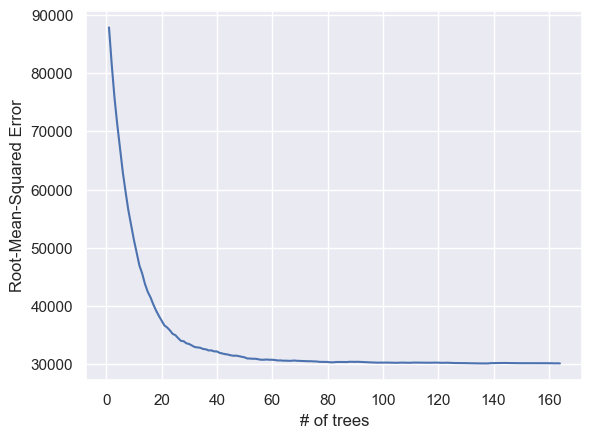

In [254]:
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("# of trees")
plt.ylabel("Root-Mean-Squared Error")
plt.show();

What can be interpreted from this graph is a sort of rational fraction relationship where we see the steep decline slowly decreasing as the model is generating more and more trees. This often occurs as the learning rate for instance is changing due to the `GradientBoostedTreesModel()` which in terms decreases the learning rate trying to find the minimum as it goes, thus changing the rate of change for the weights and the bias, leading to this sort of graph where it slowly decreases the rate of change.

We also see that the model has found that the RMSE is lowest at just over 160 trees generated (the generation was halted after 160 iterations due to finding the lowest possible RMSE value), giving an amount around close to 30,000 which is the smallest possible value that was discovered by our model. However, we will gain a specific value in the code below to give a better break-down.

In [255]:
inspect = model.make_inspector()
inspect.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=30119.970703125, rmse=30119.970703125, ndcg=None, aucs=None, auuc=None, qini=None)

Our model summary has shown us that after iterating through over 160 trees, we have received a loss (RMSE) of ~30120 which in terms of our model being in the hundreds of thousands and even more it can be understood that this model is well trained with such a low loss. Meaning it should predict the model to some level of accuracy.

### Variable Importance

Variable importance `NUM_AS_ROOT` is a feature built into TensorFlow which is able to give us the importance of each feature within the model to help us understand what has an impact on the predicted output y. This feature ranks the importance of each feature numerically so we can be able to understand, as well as grants us the ability to plot it so we get a visual understanding.

On our inspect variable we can apply the method `variable_importances()["NUM_AS_ROOT"]` to display the variable importances of all the variables (features).

In [257]:
inspect.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #45), 17.0),
 ("BsmtUnfSF" (1; #9), 14.0),
 ("GarageArea" (1; #23), 10.0),
 ("GrLivArea" (1; #25), 8.0),
 ("KitchenQual" (4; #31), 8.0),
 ("OverallCond" (1; #44), 7.0),
 ("PoolArea" (1; #47), 7.0),
 ("2ndFlrSF" (1; #1), 6.0),
 ("3SsnPorch" (1; #2), 6.0),
 ("GarageCars" (1; #24), 6.0),
 ("Condition1" (4; #11), 5.0),
 ("Functional" (4; #22), 5.0),
 ("LotConfig" (4; #35), 5.0),
 ("BedroomAbvGr" (1; #3), 4.0),
 ("BsmtFinSF2" (1; #6), 4.0),
 ("ExterQual" (4; #16), 3.0),
 ("Neighborhood" (4; #42), 3.0),
 ("YrSold" (1; #60), 3.0),
 ("LotArea" (1; #34), 2.0),
 ("RoofMatl" (4; #48), 2.0),
 ("WoodDeckSF" (1; #57), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("BsmtFinSF1" (1; #5), 1.0),
 ("Exterior1st" (4; #17), 1.0),
 ("Fireplaces" (1; #19), 1.0),
 ("HeatingQC" (4; #28), 1.0),
 ("KitchenAbvGr" (1; #30), 1.0),
 ("YearRemodAdd" (1; #59), 1.0)]

## Submission
After all of that, we can take a breathe and make predictions with the model we have trained.

In [268]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task = tfdf.keras.Task.REGRESSION, batch_size=128)

preds = model.predict(test_ds)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})

output.head()

12/12 [==============================] - 0s 3ms/step


,Id,SalePrice
0,1461,126867.671875
1,1462,158831.125000
2,1463,183974.328125
3,1464,185025.046875
4,1465,201247.218750


In [273]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = model.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

12/12 [==============================] - 0s 2ms/step


,Id,SalePrice
0,1461,126867.671875
1,1462,158831.125000
2,1463,183974.328125
3,1464,185025.046875
4,1465,201247.218750
